In [2]:
%matplotlib inline

import os
import pandas as pd
import pandas_td as td

#Initialize our connection to Treasure Data
con = td.connect(apikey=os.environ['MASTER_TD_API_KEY'], endpoint='https://api.treasuredata.com')

In [3]:
con.tables('sample_datasets')

,name,count,estimated_storage_size,last_log_timestamp,created_at
0,www_access,5000,0,2014-10-04 01:13:15+00:00,2014-10-04 01:13:12+00:00
1,nasdaq,8807278,168205061,1970-01-01 00:00:00+00:00,2014-10-08 02:57:38+00:00


In [5]:
#Query engine for Presto
engine=con.query_engine(database='sample_datasets', type='presto')

#Get 3 lines, converting time to DateTimeIndex
td.read_td_table('nasdaq', engine, limit=3,
                index_col='time', parse_dates={'time': 's'})

,symbol,open,volume,high,low,close
time,,,,,,
1979-06-14 16:00:00,ASEI,0,3780,6.3393,5.9822,6.2203
1979-06-14 16:00:00,ATRO,0,0,0.0000,0.0000,0.1930
1979-06-14 16:00:00,ALOG,0,20000,4.6250,4.4375,4.4375


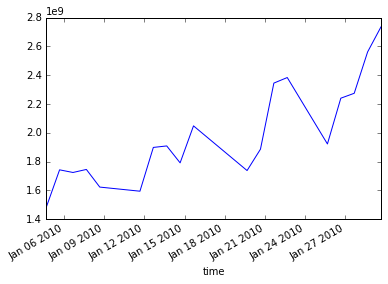

In [7]:
#Get all rows from 2010-01-01 to 2010-02-01
df = td.read_td_table('nasdaq', engine, limit=None,
                     time_range=('2010-01-01', '2010-02-01'),
                     index_col='time', parse_dates={'time': 's'})

#Plot the sum of volumes, grouped by time (index level =0)
df.groupby(level=0).volume.sum().plot()

In [8]:
#1-percent sample, with 100k rows
df= td.read_td_table('nasdaq', engine, limit=100000,
                    sample=0.01,
                    index_col='time', parse_dates={'time': 's'})
len(df)

87670

In [9]:
td.read_td_query('''
select count(*) from nasdaq where symbol='AAPL'
''', engine)

,_col0
0,8522


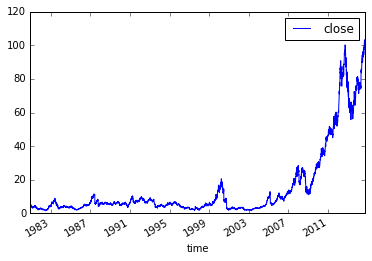

In [10]:
df = td.read_td_query('''
select time, close from nasdaq where symbol = 'AAPL'
''', engine, index_col='time', parse_dates={'time': 's'})
df.plot()